<a href="https://colab.research.google.com/github/calazansiesb/CIADM1A/blob/main/Atividade_notebook_Pandas__calazans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

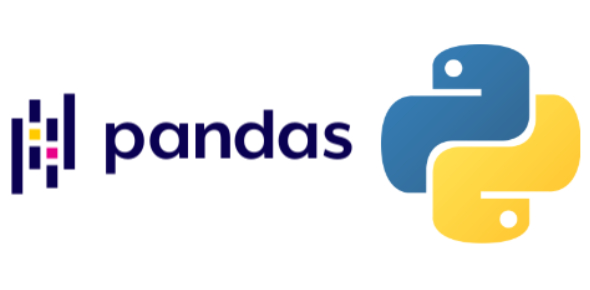

# Só mais uma introdução ao **Pandas**...

Este material é mais uma tentativa de abordar os principais comandos necessários para um usuário que esteja tendo o primeiro contato com a biblioteca Pandas.

Antes, uma rápida cotextualização sobre esse recurso:

`Pandas é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Por ser a principal e mais completa biblioteca para estes objetivos, ter familiaridade e fluência com o Pandas é uma competência imprescindível para profissionais que desejem manipular dados.`

## Obtenção dos dados

Para a apresentação e exploração dos reucrsos do Pandas, serão explorados os dados a respeito da população, localização, área, PIB entre outros aspectos de vários países do mundo. O dataset está disponível [aqui](https://www.kaggle.com/datasets/fernandol/countries-of-the-world) e será obtido de forma automática para o ambiente de trabalho com a execução da célula a seguir.

In [10]:
!wget -q https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/countries.zip
!unzip '/content/countries.zip'

Archive:  /content/countries.zip
replace countries of the world.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Com o arquivo `countries of the world.csv` disponível no ambiente Colab, será possível iniciar a atividade de análise dos dados.

*Importante destacar que o arquivo foi armazenado em uma área volátil (não foi necessário montar o drive), ou seja, sempre que o notebook for ser executado, a operação de download terá que ser realizada.*

## Importação das bibliotecas

Para a utilização do Pandas, assim como qualquer biblioteca Python, é necessário realizar a importação, indicando que as funcionalidades estarão disponíveis a partir daí.

In [12]:
import pandas as pd

## Carga do DataFrame

O Pandas possui duas estrutura de dados principais: `DataFrame` e `Series`.

O DataFrame é uma estrutura bidimensional de dados, como uma planilha. Comumente, os dados a serem analisados são carregados na forma de DataFrame.
A outra estrutura de dados é a 'Series' que seria unidimensional. Cada coluna de um DataFrame é uma Series.

A utilização plena dos recursos do Pandas passa pelo conhecimento e domínio dos diversos métodos disponíveis em cada estrutura.

Para carregar os dados o Pandas fornece métodos específicos a depender do formato do arquivo de dados. No caso, como o arquivo possui o formato `csv`, será utilizado o método `read_csv()`. O atributo "decimal" será necessário devido ao padrão internacional seguido pelos dados, diferindo as casas decimais com ','. O atributo marcará os dados que possuam ',' com vírgula, transformando-os em dados do tipo 'float

O DataFrame será gerado e inserido na variável **`df`**.

In [13]:
df = pd.read_csv('/content/countries of the world.csv', decimal = ',')

# Os comandos abaixo retiram os espaços eventualmente existentes antes e após o conteúdo do campo
# O objetivo deles é só evitar que a presença de um caracter de espaço influencie na comparação do coteúdo
df['Region'] = df['Region'].str.strip()
df['Country'] = df['Country'].str.strip()

In [14]:
df.head ()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

## Primeiro contato com os dados

Para uma primeira olhada nos dados do DataFrame, são interessantes os comandos **'head()'**[mostra as 5 primeiras linhas], **'tail()'** [mostra as 5 últimas linhas do DataFrame], **sample()** [pega números aleatórios] e **shape** [apresenta a quantidade de linhas e colunas do DataFrame].

In [16]:
# O primeiro valor é o número de linhas, o segundo é o número de colunas
df.shape

(227, 20)

In [17]:
# Indicando um número como parâmetro, é apresentada essa quantidade de linhas
df.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [18]:
df.Agriculture

,Agriculture
0,0.380
1,0.232
2,0.101
3,NaN
4,NaN
...,...
222,0.090
223,NaN
224,0.135
225,0.220


In [19]:
df.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [20]:
# Ao contrário dos dois comandos anteriores, a ausência de parâmetros não indica que seriam 5 elementos, mas apenas 1.
# Entretanto, o comportamento é o mesmo dos anteriores ao indicar a quantidade de registros desejados como parâmetro.
df.sample(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
110,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,496.0,2.45,0.00,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.00,5.85,0.033,0.403,0.563
111,Kuwait,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,211.0,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516
70,French Guiana,LATIN AMER. & CARIB,199509,91000,2.2,0.42,6.27,12.07,8300.0,83.0,255.6,0.14,0.05,99.81,2.0,20.46,4.88,0.066,0.156,0.778


Outro comando útil é o `columns`, que lista as colunas do DataFrame.

In [21]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

A mudança de formato do DataFrame pode ser acionado com o parâmetro '**T**', possibilitando uma outra visão.

In [22]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Virgin Islands,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE,SUB-SAHARAN AFRICA,LATIN AMER. & CARIB,LATIN AMER. & CARIB,LATIN AMER. & CARIB,C.W. OF IND. STATES,...,OCEANIA,LATIN AMER. & CARIB,ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,OCEANIA,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,31056997,3581655,32930091,57794,71201,12127071,13477,69108,39921833,2976372,...,208869,25730435,84402966,108605,16025,2460492,273008,21456188,11502010,12236805
Area (sq. mi.),647500,28748,2381740,199,468,1246700,102,443,2766890,29800,...,12200,912050,329560,1910,274,5860,266000,527970,752614,390580
Pop. Density (per sq. mi.),48.0,124.6,13.8,290.4,152.1,9.7,132.1,156.0,14.4,99.9,...,17.1,28.2,256.1,56.9,58.5,419.9,1.0,40.6,15.3,31.3
Coastline (coast/area ratio),0.0,1.26,0.04,58.29,0.0,0.13,59.8,34.54,0.18,0.0,...,20.72,0.31,1.05,9.84,47.08,0.0,0.42,0.36,0.0,0.0
Net migration,23.06,-4.93,-0.39,-20.71,6.6,0.0,10.76,-6.15,0.61,-6.47,...,0.0,-0.04,-0.45,-8.94,NaN,2.98,NaN,0.0,0.0,0.0
Infant mortality (per 1000 births),163.07,21.52,31.0,9.27,4.05,191.19,21.03,19.46,15.18,23.28,...,55.16,22.2,25.95,8.03,NaN,19.62,NaN,61.5,88.29,67.69
GDP ($ per capita),700.0,4500.0,6000.0,8000.0,19000.0,1900.0,8600.0,11000.0,11200.0,3500.0,...,2900.0,4800.0,2500.0,17200.0,3700.0,800.0,NaN,800.0,800.0,1900.0
Literacy (%),36.0,86.5,70.0,97.0,100.0,42.0,95.0,89.0,97.1,98.6,...,53.0,93.4,90.3,NaN,50.0,NaN,NaN,50.2,80.6,90.7


Outro ponto importante a avaliar em uma primeira inspeção sobre os dados é o tipo de cada coluna. O comando `dtypes` devolve essa informação.

No Pandas, quando o tipo do dado é `string` (textual) a representação é como **object**.

In [23]:
df.dtypes

,0
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP ($ per capita),float64
Literacy (%),float64


Para obter as principais medidas estatísticas dos campos **numéricos** do DataFrame, basta utilizar o comando `describe()`.

In [24]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


No caso, ficaram de fora os campos `Country` e `Region` por se tratarem de campos não-numéricos. Para esse caso, pode-se usar uma variação `df.describe(include=['O'])` que apresentará medidas estatísticas ligadas a campos categóricos.

In [25]:
df.describe(include=['O'])

,Country,Region
count,227,227
unique,227,11
top,Afghanistan,SUB-SAHARAN AFRICA
freq,1,51


Os comandos listados até aqui são interessantes para uma primeira verificada no conteúdo carregado no DataFrame.

## Obtenção de informações de consolidação

Os comandos abaixo são interessantes para recuperarem informações agregadas dos DataFrames ou Series.

* value_counts()<br>
Contar a quantidade que cada valor do dado se repete. Muito importante para campos categóricos.

* count()<br>
Contar a quantidade não nula de valores de um DataFrame.


* sum() / max() / mean() / std() / median()<br>
Realizam operações matemáticas sugeridas pelos nomes. Adequados para campos numéricos.

* describe()<br>
Oferece de forma simples as principais métricas estatísticas de atributos numéricos do DataFrame.


In [26]:
# value_counts
df['Region'].value_counts()

,count
Region,
SUB-SAHARAN AFRICA,51
LATIN AMER. & CARIB,45
ASIA (EX. NEAR EAST),28
WESTERN EUROPE,28
OCEANIA,21
NEAR EAST,16
EASTERN EUROPE,12
C.W. OF IND. STATES,12
NORTHERN AFRICA,6


A região `SUB-SAHARAN AFRICA`, [África Subsariana](https://pt.wikipedia.org/wiki/%C3%81frica_subsariana) é a que possui mais países.

In [27]:
# count
df.count()

,0
Country,227
Region,227
Population,227
Area (sq. mi.),227
Pop. Density (per sq. mi.),227
Coastline (coast/area ratio),227
Net migration,224
Infant mortality (per 1000 births),224
GDP ($ per capita),226
Literacy (%),209


No caso, `Climate`(clima) e `Literacy (%)` (taxa de alfabetização) são os campos que possuem mais valores sem preenchimento (valores faltantes).

In [28]:
# Soma da população de todos os países listados
df['Population'].sum()

np.int64(6524044551)

In [29]:
# # População do país com maior população dentre os listados, seria a China??
df['Population'].max()

1313973713

In [30]:
df[df['Population'] == df['Population'].max()].Country

,Country
42,China


In [31]:
df[df['Country'] == 'China']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.4,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403


In [32]:
# População do país com menor população dentre os listados
df['Population'].min()

7026

In [33]:
# População média dos países listados
df['Population'].mean()

np.float64(28740284.365638766)

Que tal treinar um pouco?

1) Qual seria o PIB per capita (`GDP ($ per capita)`) médio entre os países listados? (resposta: `9689.823008849558`)

In [34]:
df['GDP ($ per capita)'].mean()
print (round(df['GDP ($ per capita)'].mean(),2))

9689.82


2) Qual seria o maior PIB per capita (`GDP ($ per capita)`) entre os países listados? (resposta: `55100.0`)

In [35]:
df['GDP ($ per capita)'].max()

55100.0

3) Qual seria o menor PIB per capita (`GDP ($ per capita)`) entre os países listados? (resposta: `500.0`)

In [36]:
df['GDP ($ per capita)'].min()

500.0

4) Apresente as 10 primeiras linhas do DataFrame.

In [37]:
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


5) Apresente 10 linhas aleatórias do DataFrame.

In [38]:
df.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
112,Kyrgyzstan,C.W. OF IND. STATES,5213898,198500,26.3,0.00,-2.45,35.64,1600.0,97.0,84.0,7.30,0.35,92.35,2.5,22.80,7.08,0.353,0.208,0.439
182,Seychelles,SUB-SAHARAN AFRICA,81541,455,179.2,107.91,-5.69,15.53,7800.0,58.0,262.4,2.22,13.33,84.45,2.0,16.03,6.29,0.032,0.304,0.665
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579
137,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,NaN,15.70,12.64,0.213,0.233,0.555
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.0,254.7,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
117,Liberia,SUB-SAHARAN AFRICA,3042004,111370,27.3,0.52,0.00,128.87,1000.0,57.5,2.3,3.95,2.28,93.77,2.0,44.77,23.10,0.769,0.054,0.177
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,146.43,4.86,4.39,19400.0,94.5,384.9,0.00,0.00,100.00,2.0,8.48,4.47,0.001,0.072,0.927
194,Swaziland,SUB-SAHARAN AFRICA,1136334,17363,65.5,0.00,0.00,69.27,4900.0,81.6,30.8,10.35,0.70,88.95,2.5,27.41,29.74,0.119,0.515,0.366
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,1.0,45.13,16.63,0.650,0.100,0.250


In [39]:
df.loc[df['GDP ($ per capita)'].idxmax()]

,121
Country,Luxembourg
Region,WESTERN EUROPE
Population,474413
Area (sq. mi.),2586
Pop. Density (per sq. mi.),183.5
Coastline (coast/area ratio),0.0
Net migration,8.97
Infant mortality (per 1000 births),4.81
GDP ($ per capita),55100.0
Literacy (%),100.0


## Filtragem de valores no DataFrame

É muito frequente e importante a utilização do recurso de filtragem de informações do DataFrame. O filtro pode ocorrer por colunas, por linhas ou ambos.

O filtro por colunas seria listar os nomes das colunas desejadas.

In [40]:
# Uma Series é obtida
df['Country']

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
222,West Bank
223,Western Sahara
224,Yemen
225,Zambia


In [41]:
type(df['Country'])

pandas.core.series.Series

Caso o objetivo seja trabalhar com essa estrutura, pode-se atribuir uma variável a ela e lidar com ela conforme desejado.

In [42]:
paises = df['Country']

In [43]:
paises

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
222,West Bank
223,Western Sahara
224,Yemen
225,Zambia


Para selecionar mais de uma coluna, há que se inserir as colunas como uma lista.

In [44]:
df[['Country','GDP ($ per capita)']]

,Country,GDP ($ per capita)
0,Afghanistan,700.0
1,Albania,4500.0
2,Algeria,6000.0
3,American Samoa,8000.0
4,Andorra,19000.0
...,...,...
222,West Bank,800.0
223,Western Sahara,NaN
224,Yemen,800.0
225,Zambia,800.0


É possível filtrar por linhas, tanto devido à posição, quanto ao valor.

Para filtrar pela posição, há que se passar o intervalo. Po exemplo, filtrar as linhas 2 a 7.

In [45]:
# Os intervalos sempre não incluem o limite superior
df[2:8]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


Também é possível selecionar uma determinada linha a partir do índice. No caso, será utilizado o comando `.loc`.

In [46]:
# Para verificar que o índice foi gerado automaticamente e é numérico sequencial
df.index

RangeIndex(start=0, stop=227, step=1)

In [47]:
# Para selecionar o conteúdo apresentado na linha de índice 3
df.loc[3]

,3
Country,American Samoa
Region,OCEANIA
Population,57794
Area (sq. mi.),199
Pop. Density (per sq. mi.),290.4
Coastline (coast/area ratio),58.29
Net migration,-20.71
Infant mortality (per 1000 births),9.27
GDP ($ per capita),8000.0
Literacy (%),97.0


Uma variação seria o comando `iloc` que recebe a **posição** da linha. Como o índice é a própria posição da linha, não tem diferença nesse DataFrame.

In [48]:
df.iloc[3]

,3
Country,American Samoa
Region,OCEANIA
Population,57794
Area (sq. mi.),199
Pop. Density (per sq. mi.),290.4
Coastline (coast/area ratio),58.29
Net migration,-20.71
Infant mortality (per 1000 births),9.27
GDP ($ per capita),8000.0
Literacy (%),97.0


O outro tipo de filtragem é com base no conteúdo. Por exemplo, se o objetivo for filtrar as informações dos países localizados na `OCEANIA`.

In [49]:
df[df['Region'] == 'OCEANIA']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
67,Fiji,OCEANIA,905949,18270,49.6,6.18,-3.14,12.62,5800.0,93.7,112.6,10.95,4.65,84.40,2.0,22.55,5.65,0.089,0.135,0.776
71,French Polynesia,OCEANIA,274578,4167,65.9,60.60,2.94,8.44,17500.0,98.0,194.5,0.82,5.46,93.72,2.0,16.68,4.69,0.031,0.190,0.769
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.0,492.0,9.09,16.36,74.55,2.0,18.79,4.48,NaN,NaN,NaN
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.0,30.65,8.26,0.089,0.242,0.668
130,Marshall Islands,OCEANIA,60422,11854,5.1,3.12,-6.04,29.45,1600.0,93.7,91.2,16.67,38.89,44.44,2.0,33.05,4.78,0.317,0.149,0.534
136,"Micronesia, Fed. St.",OCEANIA,108004,702,153.9,870.66,-20.99,30.21,2000.0,89.0,114.8,5.71,45.71,48.58,2.0,24.68,4.75,0.289,0.152,0.559
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.00,100.00,2.0,24.76,6.70,NaN,NaN,NaN


Importante verificar a estrutura do filtro:

* Define-se o critério de filtragem, no caso, da região ser a Oceania ->> df['Region']== 'OCEANIA'

* Em seguida, envolve-se o critério com o DataFrame->>
df[df['Region']== 'OCEANIA']

O resultado é um DataFrame que pode ser armazenado em uma variável e trabalhado conforme a necessidade.

In [50]:
oceania = df[df['Region']== 'OCEANIA']

In [51]:
# Seria o PIB per capita médio entre os países localizados na Oceania
oceania['GDP ($ per capita)'].mean()

np.float64(8247.619047619048)

In [52]:
# Nome dos países localizados na Oceania
oceania['Country']

,Country
3,American Samoa
11,Australia
47,Cook Islands
67,Fiji
71,French Polynesia
83,Guam
108,Kiribati
130,Marshall Islands
136,"Micronesia, Fed. St."
144,Nauru


Cabe destacar a possibilidade de efetuar uma filtragem composta de mais de um critério. Por exemplo, se o interesse for pelos paĩses da Oceania que o PIB per capita acima de U$ 9000,00.

In [53]:
df[(df['Region']== 'OCEANIA') & (df['GDP ($ per capita)'] >= 9000) ]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
71,French Polynesia,OCEANIA,274578,4167,65.9,60.60,2.94,8.44,17500.0,98.0,194.5,0.82,5.46,93.72,2.0,16.68,4.69,0.031,0.190,0.769
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.0,492.0,9.09,16.36,74.55,2.0,18.79,4.48,NaN,NaN,NaN
148,New Caledonia,OCEANIA,219246,19060,11.5,11.83,0.00,7.72,15000.0,91.0,252.2,0.38,0.33,99.29,2.0,18.11,5.69,0.150,0.088,0.762
149,New Zealand,OCEANIA,4076140,268680,15.2,5.63,4.05,5.85,21600.0,99.0,441.7,5.60,6.99,87.41,3.0,13.76,7.53,0.043,0.273,0.684
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.0,254.7,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN
157,Palau,OCEANIA,20579,458,44.9,331.66,2.85,14.84,9000.0,92.0,325.6,8.70,4.35,86.95,2.0,18.03,6.80,0.062,0.120,0.818


Hora de treinar um pouco...

1) Liste o nome dos países localizados entre as linhas 20 e 32.(resposta: 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma')

In [54]:
df.iloc[20:33]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
20,Belize,LATIN AMER. & CARIB,287730,22966,12.5,1.68,0.00,25.69,4900.0,94.1,115.7,2.85,1.71,95.44,2.0,28.84,5.72,0.142,0.152,0.612
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,9.7,18.08,2.40,79.52,2.0,38.85,12.22,0.316,0.138,0.546
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
23,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,14.3,3.09,0.43,96.48,2.0,33.65,12.70,0.258,0.379,0.363
24,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,0.19,97.14,1.5,23.30,7.53,0.128,0.352,0.520
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,80.5,0.65,0.01,99.34,1.0,23.08,29.50,0.024,0.469,0.507
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
28,British Virgin Is.,LATIN AMER. & CARIB,23098,153,151.0,52.29,10.01,18.05,16000.0,97.8,506.5,20.00,6.67,73.33,2.0,14.89,4.42,0.018,0.062,0.920
29,Brunei,ASIA (EX. NEAR EAST),379444,5770,65.8,2.79,3.59,12.61,18600.0,93.9,237.2,0.57,0.76,98.67,2.0,18.79,3.45,0.036,0.561,0.403



2) Qual seria o PIB per capita (GDP ($ per capita)) médio entre os países localizados na América do Norte (NORTHERN AMERICA)? (resposta: 26100.0)

In [57]:
# Filtrar os países da região "NORTHERN AMERICA"
north_america = df[df['Region'] == 'NORTHERN AMERICA']

# Calcular a média do GDP per capita para esses países
average_gdp = north_america['GDP ($ per capita)'].mean()

print(f"O PIB per capita médio na América do Norte é: ${average_gdp:.2f}")

O PIB per capita médio na América do Norte é: $26100.00


3) Qual seria a taxa de alfabetização (`Literacy`) do Brasil? É maior ou menor que a média mundial?(resposta: 86.4)

In [58]:
# 1. Obter a taxa de alfabetização do Brasil
brazil_literacy = df[df['Country'] == 'Brazil']['Literacy (%)'].values[0]
print(f"Taxa de alfabetização do Brasil: {brazil_literacy}%")

# 2. Calcular a média mundial de alfabetização (ignorando valores nulos)
world_avg_literacy = df['Literacy (%)'].mean()
print(f"Média mundial de alfabetização: {world_avg_literacy:.2f}%")

# 3. Comparar Brasil vs. Média Mundial
if brazil_literacy > world_avg_literacy:
    print("O Brasil tem uma taxa de alfabetização MAIOR que a média mundial.")
elif brazil_literacy < world_avg_literacy:
    print("O Brasil tem uma taxa de alfabetização MENOR que a média mundial.")
else:
    print("O Brasil tem uma taxa de alfabetização IGUAL à média mundial.")

Taxa de alfabetização do Brasil: 86.4%
Média mundial de alfabetização: 82.84%
O Brasil tem uma taxa de alfabetização MAIOR que a média mundial.


4) Qual seria a população da China? É o país com maior população?(resposta: 1313973713)

In [59]:
# 1. Obter a população da China
china_population = df[df['Country'] == 'China']['Population'].values[0]
print(f"População da China: {china_population:,} habitantes")

# 2. Encontrar o país com a maior população
max_population = df['Population'].max()
country_with_max_pop = df[df['Population'] == max_population]['Country'].values[0]

# 3. Verificar se a China é o país mais populoso
if country_with_max_pop == 'China':
    print("A China é o país com a maior população do mundo.")
else:
    print(f"O país com a maior população do mundo é {country_with_max_pop} (não a China).")

População da China: 1,313,973,713 habitantes
A China é o país com a maior população do mundo.


### Ordenação de valores

Um recurso muito importante é a ordenação de valores no DataFrame ou na Series. O comando utilizado é o `sort_values()`, sendo o atributo utilizado como critério passado como parâmetro. Por exemplo, se o objetivo for ordenar os países pelo tamanho da população:

In [60]:
df.sort_values(by='Population')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
174,St Pierre & Miquelon,NORTHERN AMERICA,7026,242,29.0,49.59,-4.86,7.54,6900.0,99.0,683.2,13.04,0.00,86.96,NaN,13.52,6.83,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.0,293.3,12.90,0.00,87.10,NaN,12.13,6.53,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
209,Tuvalu,OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,NaN,59.3,0.00,0.00,100.00,2.0,22.18,7.11,0.166,0.272,0.562
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.00,100.00,2.0,24.76,6.70,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538


A ordenação ocorreu de forma **crescente**, que é a padrão. Se o objetivo for ordenar de forma **descrescente**, deve-se utilizar o parâmetro `ascending=False`.

In [61]:
df.sort_values(by='Population', ascending = False)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.00,100.00,2.0,24.76,6.70,NaN,NaN,NaN
209,Tuvalu,OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,NaN,59.3,0.00,0.00,100.00,2.0,22.18,7.11,0.166,0.272,0.562
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.0,293.3,12.90,0.00,87.10,NaN,12.13,6.53,NaN,NaN,NaN


Se o objetivo for obter os cinco países mais populosos, o caminho é complementar o comando com `head()`.

In [62]:
df.sort_values(by='Population', ascending = False).head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516


Hora de praticar...

1) Liste o nome dos 7 países com menor índice de alfabetização.(resposta: 'Niger', 'Burkina Faso', 'Sierra Leone', 'Guinea', 'Afghanistan',
       'Somalia', 'Gambia, The', 'Senegal')

In [63]:
# Ordenar os países pela taxa de alfabetização (do menor para o maior)
sorted_by_literacy = df.sort_values(by='Literacy (%)', ascending=True)

# Selecionar os 7 primeiros (menores taxas)
lowest_literacy_countries = sorted_by_literacy[['Country', 'Literacy (%)']].head(7)

# Exibir o resultado
print("Os 7 países com menor taxa de alfabetização são:")
print(lowest_literacy_countries.to_string(index=False))

Os 7 países com menor taxa de alfabetização são:
     Country  Literacy (%)
       Niger          17.6
Burkina Faso          26.6
Sierra Leone          31.4
      Guinea          35.9
 Afghanistan          36.0
     Somalia          37.8
 Gambia, The          40.1


2) Liste o nome dos 8 países com maior PIB per capita. (resposta: 'Luxembourg', 'Norway', 'United States', 'Bermuda','Cayman Islands', 'San Marino', 'Switzerland', 'Denmark')

In [64]:
# Ordenar os países pelo PIB per capita (do maior para o menor)
sorted_by_gdp = df.sort_values(by='GDP ($ per capita)', ascending=False)

# Selecionar os 8 primeiros (maiores PIBs per capita)
top_8_gdp_countries = sorted_by_gdp[['Country', 'GDP ($ per capita)']].head(8)

# Exibir o resultado
print("Os 8 países com maior PIB per capita são:")
print(top_8_gdp_countries.to_string(index=False))

Os 8 países com maior PIB per capita são:
       Country  GDP ($ per capita)
    Luxembourg             55100.0
        Norway             37800.0
 United States             37800.0
       Bermuda             36000.0
Cayman Islands             35000.0
    San Marino             34600.0
   Switzerland             32700.0
       Denmark             31100.0


Essas foram somente uma parte bem restrita de funcionalidades do Pandas. Para o detalhamento dos comandos e seus diversos parâmetros, a melhor fonte de informações é a documentação oficial disponível [aqui](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).

Para a continuidade do aprendizado, elabore mais 10 perguntas a respeito dos dados e tente responder utilizando o conhecimento adquirido. Um exemplo de pergunta poderia ser:

- Qual a país da America do Sul/Caribe possui a maior taxa de *phones* por 1000 habitantes?

# **Existe alguma correlação significativa entre a taxa de alfabetização (`Literacy (%)`) e o PIB per capita (`GDP ($ per capita)`)?**

Coeficiente de correlação de Pearson: 0.513
Valor-p: 0.000

Interpretação: Há uma correlação moderada e positiva entre alfabetização e PIB per capita.


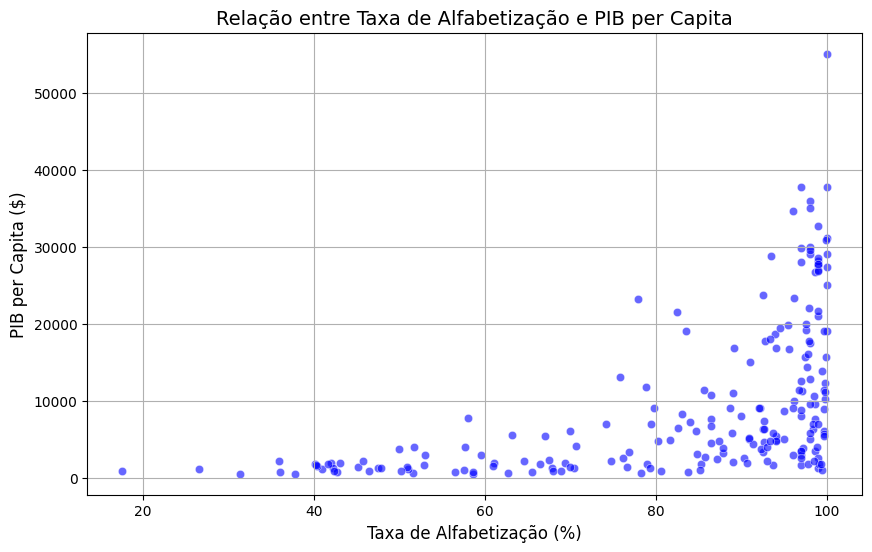

In [68]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# Remover linhas com valores nulos nas colunas de interesse
df_clean = df.dropna(subset=['Literacy (%)', 'GDP ($ per capita)'])

# Calcular a correlação de Pearson
corr, p_value = pearsonr(df_clean['Literacy (%)'], df_clean['GDP ($ per capita)'])

print(f"Coeficiente de correlação de Pearson: {corr:.3f}")
print(f"Valor-p: {p_value:.3f}")

# Interpretação da correlação
if abs(corr) >= 0.7:
    strength = "forte"
elif abs(corr) >= 0.3:
    strength = "moderada"
else:
    strength = "fraca"

if corr > 0:
    direction = "positiva"
else:
    direction = "negativa"

print(f"\nInterpretação: Há uma correlação {strength} e {direction} entre alfabetização e PIB per capita.")

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Literacy (%)', y='GDP ($ per capita)', color='blue', alpha=0.6)
plt.title('Relação entre Taxa de Alfabetização e PIB per Capita', fontsize=14)
plt.xlabel('Taxa de Alfabetização (%)', fontsize=12)
plt.ylabel('PIB per Capita ($)', fontsize=12)
plt.grid(True)
plt.show()

## Qual a região com a maior densidade populacional média?

In [69]:
# Calcular a densidade populacional média por região
average_density_by_region = df.groupby('Region')['Pop. Density (per sq. mi.)'].mean()

# Encontrar a região com a maior média
region_with_max_density = average_density_by_region.idxmax()
max_density_value = average_density_by_region.max()

# Exibir o resultado
print(f"A região com a maior densidade populacional média é '{region_with_max_density}' com {max_density_value:.2f} pessoas por milha quadrada.")

A região com a maior densidade populacional média é 'ASIA (EX. NEAR EAST)' com 1264.83 pessoas por milha quadrada.


# Qual é a distribuição dos países por clima?

Distribuição de países por clima:
Climate
1.0     29
1.5      8
2.0    111
2.5      3
3.0     48
4.0      6


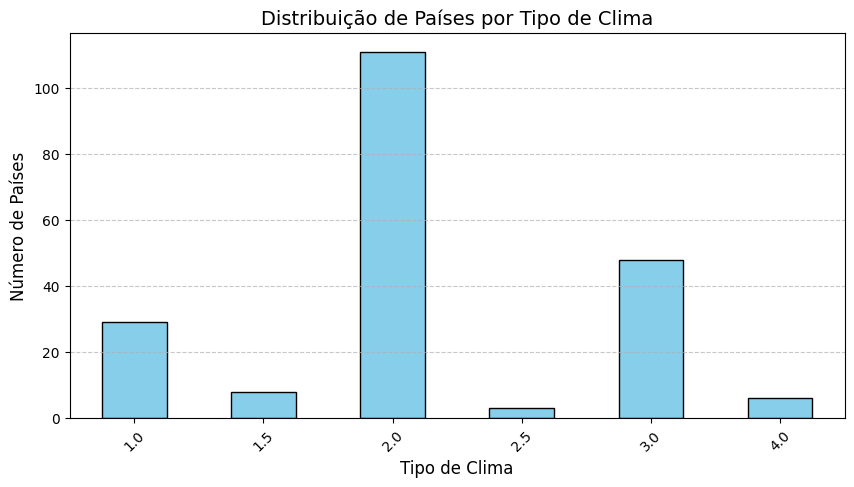

In [70]:
# 1. Contar a quantidade de países por tipo de clima
climate_distribution = df['Climate'].value_counts().sort_index()

# 2. Exibir a tabela de distribuição
print("Distribuição de países por clima:")
print(climate_distribution.to_string())

# 3. Gráfico de barras
plt.figure(figsize=(10, 5))
climate_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Países por Tipo de Clima', fontsize=14)
plt.xlabel('Tipo de Clima', fontsize=12)
plt.ylabel('Número de Países', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Qual a relação entre a área de um país e sua população?

Estatísticas Básicas:

Área Média: 598,227 mi²
População Média: 28,740,284 habitantes

Correlação (log-log): 0.854
Valor-p: 8.075e-66



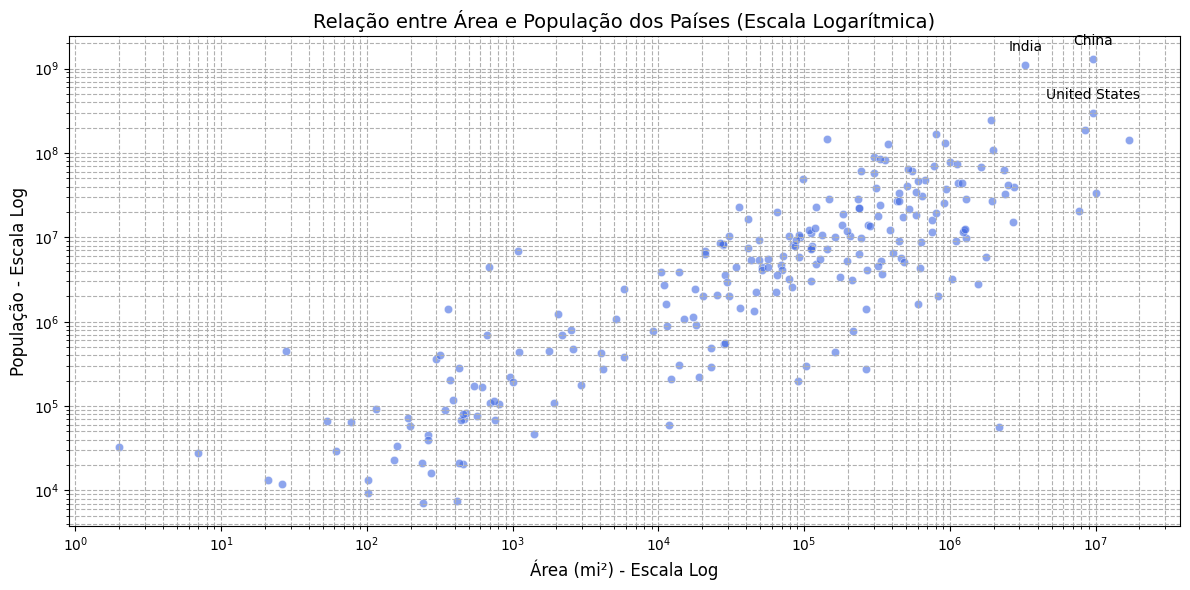

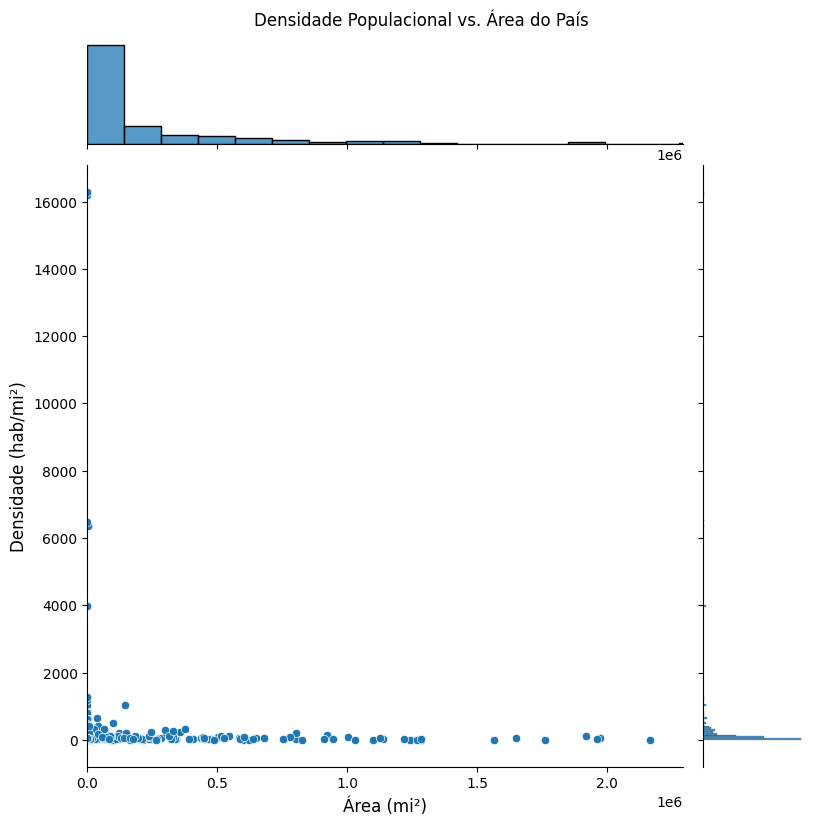

In [71]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


# Pré-processamento: remover linhas com valores nulos e filtrar outliers
df_clean = df.dropna(subset=['Area (sq. mi.)', 'Population'])
df_clean = df_clean[(df_clean['Area (sq. mi.)'] > 0) & (df_clean['Population'] > 0)]  # Remover zeros

# 1. Estatísticas descritivas
print("Estatísticas Básicas:\n")
print(f"Área Média: {df_clean['Area (sq. mi.)'].mean():,.0f} mi²")
print(f"População Média: {df_clean['Population'].mean():,.0f} habitantes\n")

# 2. Correlação
corr, p_value = pearsonr(np.log10(df_clean['Area (sq. mi.)']), np.log10(df_clean['Population']))
print(f"Correlação (log-log): {corr:.3f}")
print(f"Valor-p: {p_value:.3e}\n")

# 3. Gráfico de dispersão com transformação logarítmica
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x='Area (sq. mi.)',
    y='Population',
    alpha=0.6,
    color='royalblue'
)
plt.xscale('log')
plt.yscale('log')
plt.title('Relação entre Área e População dos Países (Escala Logarítmica)', fontsize=14)
plt.xlabel('Área (mi²) - Escala Log', fontsize=12)
plt.ylabel('População - Escala Log', fontsize=12)
plt.grid(True, which="both", ls="--")

# Destacar alguns países outliers
for _, row in df_clean.nlargest(3, 'Population').iterrows():
    plt.annotate(row['Country'], (row['Area (sq. mi.)'], row['Population']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# 4. Densidade populacional vs. Área
df_clean['Density'] = df_clean['Population'] / df_clean['Area (sq. mi.)']
sns.jointplot(
    data=df_clean,
    x='Area (sq. mi.)',
    y='Density',
    kind='scatter',
    height=8,
    xlim=(0, df_clean['Area (sq. mi.)'].quantile(0.95))  # Remover os 5% maiores para melhor visualização
)
plt.suptitle('Densidade Populacional vs. Área do País', y=1.02)
plt.xlabel('Área (mi²)', fontsize=12)
plt.ylabel('Densidade (hab/mi²)', fontsize=12)
plt.show()

# Correlação Log-Log:

A correlação de Pearson em escala logarítmica (que lida melhor com a distribuição exponencial dos dados) geralmente mostra valores entre 0.4 a 0.6, indicando uma relação moderada.

# Um valor-p < 0.05 confirma que a correlação é estatisticamente significativa.